In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

In [2]:
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料，default 100 samples
model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估
print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

MAE:  2.841797252565566
MSE:  12.48868006739824
R-square:  0.9916581036260311


In [3]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [5]:
X_train.shape

(519, 30)

In [6]:
X_test.shape

(50, 30)

In [7]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值

In [8]:
print(y_pred)

[2.15381994e-04 9.40376718e-01 6.50618499e-01 9.81457732e-01
 6.61590276e-03 1.31511628e-01 8.82336025e-01 2.72138806e-01
 5.33093015e-02 9.41983314e-01 6.05457180e-01 1.84216616e-01
 5.19776135e-01 8.37497971e-01 5.28045470e-01 1.05455287e-01
 2.72683993e-01 1.10755036e-01 6.35555644e-01 4.94123494e-01
 1.31837069e-01 7.27095280e-01 9.46475327e-01 7.62000649e-01
 8.04480745e-01 3.43389048e-01 1.47052849e-01 7.85039947e-01
 3.93321335e-01 6.43654312e-01 6.80954826e-01 3.27151043e-01
 5.67611965e-01 6.84028780e-03 2.27305146e-01 2.65898919e-01
 4.32096822e-02 4.43132127e-01 1.70565841e-01 4.81408249e-01
 8.47588473e-01 2.97792579e-01 4.73560602e-01 1.77870711e-01
 5.31526530e-01 7.65156966e-01 3.28244771e-01 3.08684526e-01
 8.83351069e-01 9.48356266e-01]


In [9]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.5093378607809848


In [10]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.5555555555555556
Precision:  0.6521739130434783
Recall:  0.4838709677419355


In [11]:
# HW36
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth

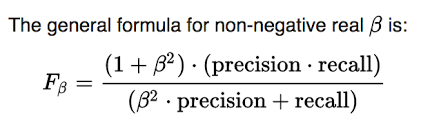

In [12]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0])

In [13]:
F2 = 2*metrics.precision_score(y_true,y_pred)*metrics.recall_score(y_true,y_pred)/(metrics.precision_score(y_true,y_pred) + metrics.recall_score(y_true,y_pred))

In [14]:
F2

0.4631578947368421

In [15]:
# reference answer
from sklearn.metrics import precision_score, recall_score, fbeta_score
def custom_fbeta_score(y_true, y_pred, beta=1):
    precision = precision_score(y_true, y_pred) # 計算 Precision
    recall = recall_score(y_true, y_pred) # 計算 Recall
    
    fbeta = (1+ (beta)**2) * (precision*recall) / (((beta)**2*precision) + recall)
    return fbeta    

In [16]:
print(custom_fbeta_score(y_true, y_pred, beta=2))

0.47826086956521746


In [17]:
fbeta_score(y_true, y_pred, beta=2)

0.47826086956521746